<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Pereptron/Perceptron_detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron



![Perceptron](https://drive.google.com/uc?id=1MpXnhm2FJkPnjB99HrDIU_IGX1JTGdJ-)

The model equation is:

$y=1,\mbox{if} \sum_i w_ix_i>=b$

$y=0,\mbox{otherwise}$

Objective: Formation of a perectron model for classifying the bresat_cancer dataset in sklearn.datasets

In [0]:
import numpy as np
import pandas as pd

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
X=breast_cancer.data
Y=breast_cancer.target

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

No binarization of data is required. Input is simply real numbers and output is in bollean format

The perceptron class has for functions.
1. initialization of model parameters
2. model equation
3. predicting the output for a give input
4. fitting the model into a given set of input and output

In [0]:
class Perceptron:

  def __init__(self):
    self.b=None
    self.w=None

  def model(self,X):
    return 1 if (np.dot(self.w,X)>=self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    self.b=1
    self.w=np.ones(X.shape[1])

    for x,y in zip(X,Y):
      y_pred=self.model(x)

      if y==1 and y_pred==0:
        self.b=self.b+1
        self.w =self.w+x
      elif y==0 and y_pred==1:
        self.b=self.b-1
        self.w=self.w-1

In [0]:
perceptron_test=Perceptron()

In [0]:
perceptron_test.fit(X_train,Y_train)

In [23]:
Y_train_pred=perceptron_test.predict(X_train)
accuracy=accuracy_score(Y_train_pred,Y_train)
print(accuracy)

0.626953125


In [24]:
Y_test_pred=perceptron_test.predict(X_test)
accuracy=accuracy_score(Y_test_pred,Y_test)
print(accuracy)

0.631578947368421


Here we are seeing that the perceptron model has a low accuracy of 63% on the test data.

It could be better by running it for more epochs.

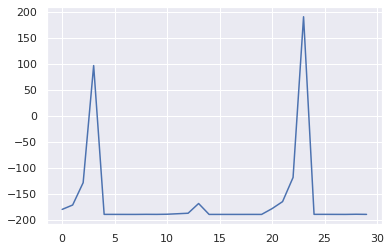

In [25]:
plt.plot(perceptron_test.w)
plt.show()